# Write A Data Science Blog Post

## Pick a dataset

https://www.kaggle.com/hsankesara/medium-articles

**Description:**

Context
Medium is one of the most famous tools for spreading knowledge about almost any field. It is widely used to published articles on ML, AI, and data science. This dataset is the collection of about 350 articles in such fields.

Content
The dataset contains articles, their title, number of claps it has received, their links and their reading time.

Acknowledgements
This dataset was scraped from Medium. I created a Python script to scrap all the required articles using just their tags from Medium. Check out the script here

Inspiration
How to write a good article? How to inform the reader in an interesting way? What sort of title attracts more crowd? How long an article should be?

## Create a Jupyter Notebook, using any associated packages you'd like, to:


### 3.1. Business Understanding

* How well can we predict claps? What aspects correlate well to clap?
* How well can we predict reading time? What aspects correlate well to reading time?
* What aspects correlate well to a high clap?
* What aspects correlate well to reading time for high claps?

### 3.2. Data Understanding

Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from collections import defaultdict

Import dataset

In [2]:
df = pd.read_csv('articles.csv', sep=',')
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


Investigate dataset

In [3]:
df.describe()

,reading_time
count,337.000000
mean,9.700297
std,5.482855
min,2.000000
25%,6.000000
50%,8.000000
75%,13.000000
max,31.000000


Investigate data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


Check for missing values

In [5]:
df.isnull().sum()

author          0
claps           0
reading_time    0
link            0
title           0
text            0
dtype: int64

No missing values at all

Visualize the dataset

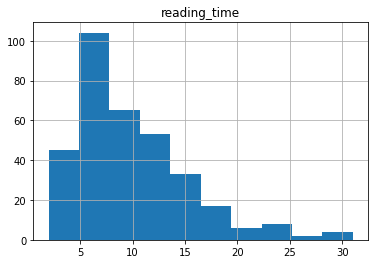

In [6]:
df.hist();

### 3.3. Prepare Data

####  Column 1: claps

**Claps** should be an integer, let's transform it

In [7]:
df['claps'] = df['claps'].astype(str).str.replace('.','').str.replace('K','00')
df['claps'] = df['claps'].astype(int)

Verify

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    int32 
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 14.6+ KB


In [9]:
df['claps'].value_counts().sort_values()

2700     1
330      1
340      1
341      1
264      1
        ..
4400     9
3       10
3900    11
2300    12
1       14
Name: claps, Length: 156, dtype: int64

####  Column 2: link

Drop unnecessary columns

In [10]:
 df = df.drop(['link'], axis=1)

Verify

In [11]:
df.head()

,author,claps,reading_time,title,text
0,Justin Lee,8300,11,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1400,7,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2800,11,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1300,7,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


####  Column 3: title and text

Transform text based columns into word and character count columns

In [12]:
# functions we use in word_to_count
char_count = lambda x: len(x)
word_count = lambda x: len(re.findall(r'\w+', x))

def word_to_count(df, col_name, drop=False):
    '''
    INPUT:
    df - the pandas dataframe you want to transform
    col_name - the column name you want to transform

    OUTPUT:
    df - a dataframe with the count of words/characters of all text based columns
    '''
    df[col_name + '_len'] = df.text.apply(char_count)
    df[col_name + '_word_count'] = df.text.apply(word_count)
    
    # remove origin column
    if drop:
        df = df.drop([col_name], axis=1)
    return df

In [13]:
df = word_to_count(df, 'title')
df = word_to_count(df, 'text', drop=True)

Verify

In [14]:
df.head()

,author,claps,reading_time,title,title_len,title_word_count,text_len,text_word_count
0,Justin Lee,8300,11,Chatbots were the next big thing: what happene...,12129,2072,12129,2072
1,Conor Dewey,1400,7,Python for Data Science: 8 Concepts You May Ha...,7730,1371,7730,1371
2,William Koehrsen,2800,11,Automated Feature Engineering in Python – Towa...,14070,2324,14070,2324
3,Gant Laborde,1300,7,Machine Learning: how to go from Zero to Hero ...,8076,1494,8076,1494
4,Emmanuel Ameisen,935,11,Reinforcement Learning from scratch – Insight ...,13784,2411,13784,2411


####  Column 4: title - further investigations

Transform it into categorical columns: search for keywords in title

In [15]:
def plot_keywords(df, col, possible_vals):
    '''
    INPUT 
        df - a dataframe holding the title column
        title - string the title of your plot      
        keywords - the keywords you want to search for
    OUTPUT
        keywords_df - a dataframe with the count of how many keywords found
        Displays a plot of pretty things related to the col column.
    '''
    df = df[col].value_counts().reset_index()
    df.rename(columns={'index': col, 'title': 'count'}, inplace=True)
    
    # count the keywords
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in possible_vals:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col][idx]:
                new_df[val] += int(df['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col, 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    
    # plot the keywords
    new_df.set_index(col, inplace=True)

    (new_df/new_df.sum()).plot(kind='bar', legend=None);
    plt.title('Keywords in title');
    plt.show()
    props_keywords_df = new_df/new_df.sum()

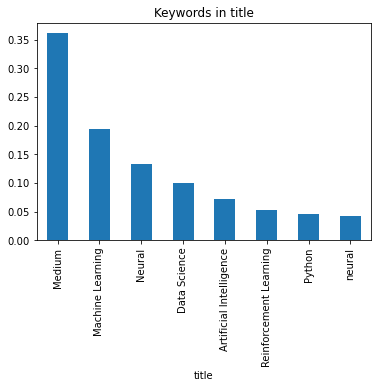

In [16]:
keywords = ["Machine Learning","Artificial Intelligence", "Data Science","Python","Reinforcement Learning", "Neural", "neural", "Medium"]
plot_keywords(df, 'title', keywords)

Transform the 4 most common keywords into categorical columns

In [17]:
def transform_title_to_cat_col(df, name, keyword):
    '''
    INPUT 
        df - a dataframe holding the title column
        name - the name of the new categorical column  
        keywords - the keywords you want to search for
    OUTPUT
        df - a dataframe with the categorical column: keyword found / not found
    '''
    df[name] = df.title.str.contains(keyword, regex=True)
    df[name] = df[name].replace(to_replace=[False, True], value=[0, 1])
    return df

In [18]:
df = transform_title_to_cat_col(df, 'machine_learning', '[Mm]achine [Ll]earning|ML')
df = transform_title_to_cat_col(df, 'deep_learning', '[Dd]eep [Ll]earning')
df = transform_title_to_cat_col(df, 'ai', '[Aa]rtificial [Ii]ntelligence|[Aa]\.?[Ii]\.?')
df = transform_title_to_cat_col(df, 'neural_networks', '[Nn]eural|[Nn]eurons')
df = transform_title_to_cat_col(df, 'medium', 'Medium')

# drop the colum we already transformed
df = df.drop(['title'], axis=1)

Verify

In [19]:
df.head()

,author,claps,reading_time,title_len,title_word_count,text_len,text_word_count,machine_learning,deep_learning,ai,neural_networks,medium
0,Justin Lee,8300,11,12129,2072,12129,2072,0,0,0,0,1
1,Conor Dewey,1400,7,7730,1371,7730,1371,0,0,0,0,0
2,William Koehrsen,2800,11,14070,2324,14070,2324,0,0,0,0,0
3,Gant Laborde,1300,7,8076,1494,8076,1494,1,0,0,0,0
4,Emmanuel Ameisen,935,11,13784,2411,13784,2411,0,0,0,0,0


####  Column 5: author - further investigations

Check if an author wrote more than one article

In [20]:
df['author'].value_counts()

Adam Geitgey           16
Arthur Juliani         10
Slav Ivanov            10
Milo Spencer-Harper     8
Dhruv Parthasarathy     6
                       ..
Francesco Gadaleta      1
Joel Leeman             1
Chris Jagers            1
Eventbrite              1
George Seif             1
Name: author, Length: 182, dtype: int64

Transform it into a categorical column for authors > 6

In [21]:
df['author'].value_counts() > 6

Adam Geitgey            True
Arthur Juliani          True
Slav Ivanov             True
Milo Spencer-Harper     True
Dhruv Parthasarathy    False
                       ...  
Francesco Gadaleta     False
Joel Leeman            False
Chris Jagers           False
Eventbrite             False
George Seif            False
Name: author, Length: 182, dtype: bool

In [22]:
def transform_author_to_cat_col(df, author, col):
    '''
    INPUT 
        df - a dataframe holding the author column
        author - the name of author you want to tranform into a categorical column
        col - the column name you want
    OUTPUT
        df - a dataframe with the categorical column: author found/ not found
    '''
    df[col] = df.author.str.match(author)
    df[col] = df[col].replace(to_replace=[False, True], value=[0, 1])
    return df

In [23]:
df = transform_author_to_cat_col(df, 'Adam Geitgey', 'adam_geitgey')
df = transform_author_to_cat_col(df, 'Arthur Juliani', 'arthur_juliani')
df = transform_author_to_cat_col(df, 'Slav Ivanov', 'slav_ivanov')
df = transform_author_to_cat_col(df, 'Milo Spencer-Harper', 'milo_spencer_harper')

# drop the colum we already transformed
df = df.drop(['author'], axis=1)

Verify

In [24]:
df.head()

,claps,reading_time,title_len,title_word_count,text_len,text_word_count,machine_learning,deep_learning,ai,neural_networks,medium,adam_geitgey,arthur_juliani,slav_ivanov,milo_spencer_harper
0,8300,11,12129,2072,12129,2072,0,0,0,0,1,0,0,0,0
1,1400,7,7730,1371,7730,1371,0,0,0,0,0,0,0,0,0
2,2800,11,14070,2324,14070,2324,0,0,0,0,0,0,0,0,0
3,1300,7,8076,1494,8076,1494,1,0,0,0,0,0,0,0,0
4,935,11,13784,2411,13784,2411,0,0,0,0,0,0,0,0,0


In [25]:
df [df['milo_spencer_harper'] == 1]

,claps,reading_time,title_len,title_word_count,text_len,text_word_count,machine_learning,deep_learning,ai,neural_networks,medium,adam_geitgey,arthur_juliani,slav_ivanov,milo_spencer_harper
101,7800,6,5680,1004,5680,1004,0,0,0,1,0,0,0,0,1
126,7800,6,5680,1004,5680,1004,0,0,0,1,0,0,0,0,1
131,2200,3,3417,602,3417,602,0,0,0,1,0,0,0,0,1
179,2200,3,3417,602,3417,602,0,0,0,1,0,0,0,0,1
181,1800,4,4315,759,4315,759,0,1,0,1,1,0,0,0,1
300,2200,3,3417,602,3417,602,0,0,0,1,0,0,0,0,1
302,317,6,7497,1252,7497,1252,0,0,0,0,0,0,0,0,1
304,42,3,4042,738,4042,738,0,0,0,0,0,0,0,0,1


####  Investigate the new dataset

In [26]:
df.describe()

,claps,reading_time,title_len,title_word_count,text_len,text_word_count,machine_learning,deep_learning,ai,neural_networks,medium,adam_geitgey,arthur_juliani,slav_ivanov,milo_spencer_harper
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,3213.997033,9.700297,11120.160237,1911.706231,11120.160237,1911.706231,0.169139,0.157270,0.231454,0.139466,0.281899,0.047478,0.029674,0.029674,0.023739
std,4281.107659,5.482855,7455.120310,1273.107519,7455.120310,1273.107519,0.375432,0.364597,0.422389,0.346947,0.450593,0.212975,0.169938,0.169938,0.152461
min,1.000000,2.000000,1350.000000,117.000000,1350.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.000000,6.000000,6103.000000,1050.000000,6103.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1300.000000,8.000000,8697.000000,1494.000000,8697.000000,1494.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4300.000000,13.000000,14237.000000,2529.000000,14237.000000,2529.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,19100.000000,31.000000,44527.000000,8016.000000,44527.000000,8016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   claps                337 non-null    int32
 1   reading_time         337 non-null    int64
 2   title_len            337 non-null    int64
 3   title_word_count     337 non-null    int64
 4   text_len             337 non-null    int64
 5   text_word_count      337 non-null    int64
 6   machine_learning     337 non-null    int64
 7   deep_learning        337 non-null    int64
 8   ai                   337 non-null    int64
 9   neural_networks      337 non-null    int64
 10  medium               337 non-null    int64
 11  adam_geitgey         337 non-null    int64
 12  arthur_juliani       337 non-null    int64
 13  slav_ivanov          337 non-null    int64
 14  milo_spencer_harper  337 non-null    int64
dtypes: int32(1), int64(14)
memory usage: 38.3 KB


Visualize the new tranformed dataset

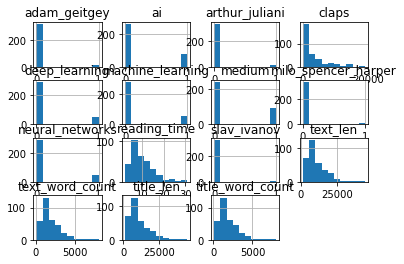

In [28]:
df.hist();

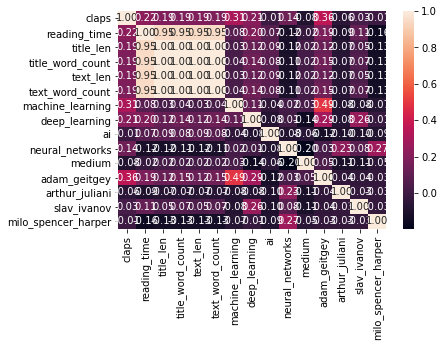

In [29]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

Introduce an new dataset which contains only high claps

In [30]:
high_claps = df[df.claps >= 4300]
high_claps.head()

,claps,reading_time,title_len,title_word_count,text_len,text_word_count,machine_learning,deep_learning,ai,neural_networks,medium,adam_geitgey,arthur_juliani,slav_ivanov,milo_spencer_harper
0,8300,11,12129,2072,12129,2072,0,0,0,0,1,0,0,0,0
12,7300,14,19130,3352,19130,3352,0,1,0,0,0,0,0,0,0
14,14200,15,17497,3260,17497,3260,1,1,0,1,0,1,0,0,0
15,15200,13,13640,2480,13640,2480,1,1,0,0,0,1,0,0,0
16,4800,13,15325,2685,15325,2685,0,0,0,0,0,0,0,0,0


Compare high claps to the default dataframe

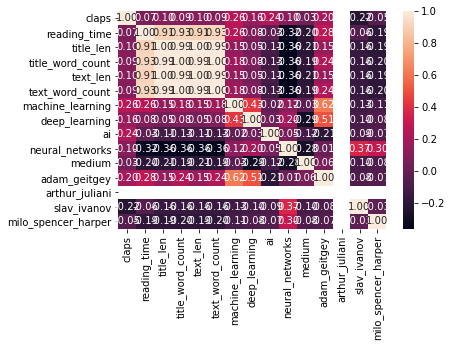

In [31]:
sns.heatmap(high_claps.corr(), annot=True, fmt=".2f");

### 3.4. Model Data

In [32]:
def fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    try:
        color = 'red' if val < 0 else 'black'
        return 'color: %s' % color
    except:
        return val

#### Investigate: claps

In [33]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(df, 'claps')
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
coef_df_claps = coef_weights(lm_model.coef_, X_train)

The rsquared on the training data was 0.30367976889741055.  The rsquared on the test data was 0.09283685580328394.


In [34]:
coef_df_claps.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
10,adam_geitgey,5925.718103,5925.718103
5,machine_learning,1769.552387,1769.552387
8,neural_networks,1706.373721,1706.373721
6,deep_learning,1610.219051,1610.219051
13,milo_spencer_harper,899.580189,899.580189
12,slav_ivanov,513.518286,513.518286
11,arthur_juliani,-437.322133,437.322133
9,medium,-400.765049,400.765049
7,ai,345.625229,345.625229
0,reading_time,180.214034,180.214034


#### Investigate: reading time

In [35]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(df, 'reading_time')
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
coef_df_reading_time = coef_weights(lm_model.coef_, X_train)

The rsquared on the training data was 0.9146640644514368.  The rsquared on the test data was 0.9150944380190538.


In [36]:
coef_df_reading_time.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
12,slav_ivanov,1.351872,1.351872
13,milo_spencer_harper,-0.718252,0.718252
11,arthur_juliani,-0.670936,0.670936
10,adam_geitgey,0.504908,0.504908
5,machine_learning,0.440414,0.440414
9,medium,-0.428571,0.428571
6,deep_learning,0.384930,0.384930
8,neural_networks,-0.381156,0.381156
7,ai,0.031617,0.031617
4,text_word_count,0.001772,0.001772


#### Investigate: claps & reading time of  high claps

In [37]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(high_claps, 'claps')
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
coef_df_high_claps = coef_weights(lm_model.coef_, X_train)

The rsquared on the training data was 0.3809096297789457.  The rsquared on the test data was -0.1524125088579138.


In [38]:
coef_df_high_claps.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
10,adam_geitgey,5319.029995,5319.029995
12,slav_ivanov,-5096.874924,5096.874924
7,ai,4183.072932,4183.072932
8,neural_networks,3011.232920,3011.232920
13,milo_spencer_harper,-1876.681906,1876.681906
9,medium,380.657769,380.657769
6,deep_learning,-287.085006,287.085006
0,reading_time,-144.146239,144.146239
5,machine_learning,-99.564210,99.564210
4,text_word_count,-3.199727,3.199727


In [39]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(high_claps, 'reading_time')
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
coef_df_high_claps_reading = coef_weights(lm_model.coef_, X_train)

The rsquared on the training data was 0.9441401901913539.  The rsquared on the test data was 0.7798231344010658.


In [40]:
coef_df_high_claps_reading.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
12,slav_ivanov,2.704945,2.704945
10,adam_geitgey,1.918879,1.918879
7,ai,1.161913,1.161913
8,neural_networks,-0.635525,0.635525
6,deep_learning,-0.620167,0.620167
13,milo_spencer_harper,0.345981,0.345981
9,medium,-0.335581,0.335581
5,machine_learning,0.283070,0.283070
4,text_word_count,0.001000,0.001000
2,title_word_count,0.001000,0.001000


### 3.5. Results

#### Claps and reading time

* What aspects correlate well to clap?
* What aspects correlate well to reading time?

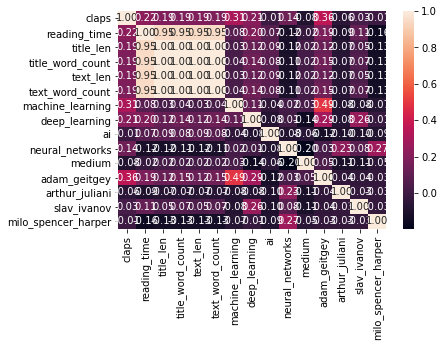

In [41]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

* what correlates to clap? **machine learning, ai and adam geitgey**
* what correlates to reading time? **title length, title word count, text length and text word count**

#### High Claps

* What aspects correlate well to a high clap?
* What aspects correlate well to reading time for high claps?

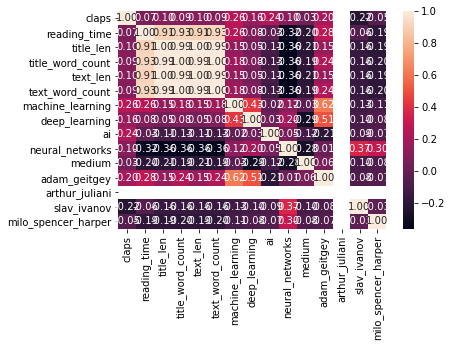

In [42]:
sns.heatmap(high_claps.corr(), annot=True, fmt=".2f");

* what correlates to clap? **Machine Learning, AI and the author "Adam Geitgey"**
* what correlates to reading time? **title length, title word count, text length and text word count + Machine Learning and the author "Adam geitge"y**

#### Predict Claps

* How well can we predict claps? What aspects correlate well to claps?

In [43]:
coef_df_claps.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
10,adam_geitgey,5925.718103,5925.718103
5,machine_learning,1769.552387,1769.552387
8,neural_networks,1706.373721,1706.373721
6,deep_learning,1610.219051,1610.219051
13,milo_spencer_harper,899.580189,899.580189
12,slav_ivanov,513.518286,513.518286
11,arthur_juliani,-437.322133,437.322133
9,medium,-400.765049,400.765049
7,ai,345.625229,345.625229
0,reading_time,180.214034,180.214034


* How well can we predict claps? 
**Not quite good because the rsquared on the training data was 0.3809096297789457.  The rsquared on the test data was -0.1524125088579138.**

* What aspects correlate well to claps?
**The author "Adam Geitgey" and Machine Learning**

#### Predict Reading Time

* How well can we predict reading time? What aspects correlate well to reading time?

In [44]:
coef_df_reading_time.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
12,slav_ivanov,1.351872,1.351872
13,milo_spencer_harper,-0.718252,0.718252
11,arthur_juliani,-0.670936,0.670936
10,adam_geitgey,0.504908,0.504908
5,machine_learning,0.440414,0.440414
9,medium,-0.428571,0.428571
6,deep_learning,0.384930,0.384930
8,neural_networks,-0.381156,0.381156
7,ai,0.031617,0.031617
4,text_word_count,0.001772,0.001772


* How well can we predict reading time? 
**Good because the rsquared on the training data was 0.9146640644514368.  The rsquared on the test data was 0.9150944380190538.**

* What aspects correlate well to reading time?
**The author "Slav Ivanov", "Adam Geitgey" and Machine Learning**

#### Predict High Claps

In [45]:
coef_df_high_claps.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
10,adam_geitgey,5319.029995,5319.029995
12,slav_ivanov,-5096.874924,5096.874924
7,ai,4183.072932,4183.072932
8,neural_networks,3011.232920,3011.232920
13,milo_spencer_harper,-1876.681906,1876.681906
9,medium,380.657769,380.657769
6,deep_learning,-287.085006,287.085006
0,reading_time,-144.146239,144.146239
5,machine_learning,-99.564210,99.564210
4,text_word_count,-3.199727,3.199727


* How well can we predict high claps? 
**Not quite good because the rsquared on the training data was 0.3809096297789457.  The rsquared on the test data was -0.1524125088579138.**

* What aspects correlate well to claps?
**The author "Adam Geitgey" and AI**

#### Predict High Claps Reading Time

In [46]:
coef_df_high_claps_reading.style.\
    applymap(color_negative_red)

,est_int,coefs,abs_coefs
12,slav_ivanov,2.704945,2.704945
10,adam_geitgey,1.918879,1.918879
7,ai,1.161913,1.161913
8,neural_networks,-0.635525,0.635525
6,deep_learning,-0.620167,0.620167
13,milo_spencer_harper,0.345981,0.345981
9,medium,-0.335581,0.335581
5,machine_learning,0.283070,0.283070
4,text_word_count,0.001000,0.001000
2,title_word_count,0.001000,0.001000


* How well can we predict high claps reading time? 
**Good because the rsquared on the training data was 0.9441401901913539.  The rsquared on the test data was 0.7798231344010658.**

* What aspects correlate well to reading time?
**The author "Slav Ivanov", "Adam Geitgey" and AI**